In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

import pickle 

from matplotlib.ticker import FuncFormatter

In [2]:
recs = pd.read_pickle("../EASE_recs_top_100")
games = pd.read_csv("../data/games_data.csv")
explicit = pd.read_csv("D:/0Studia/Data-Science-PW/Masters-thesis/data/"+"explicit_train.csv")

unique_games = pd.DataFrame(explicit.game_id.unique(), columns=["game_id"])
del explicit 

games = games.merge(unique_games, on="game_id", how="right")

In [3]:
n_tops = [10, 25, 50] #100 is max
games_count_list = []

for n_top in n_tops:
    games_count = {}
    for u,rs in recs.items():
        for r in rs[:n_top]:
            try:
                games_count[r] += 1
            except: games_count[r] = 1
    games_count_list.append(games_count)

In [4]:
res = []
for i in range(len(n_tops)):
    games_count_pd = pd.DataFrame(games_count_list[i].items(), columns=["game_id", "count"])
    tmp = games_count_pd.merge(games[["game_id", "game_name"]], how="right", on="game_id")
    tmp = tmp.fillna(0)

    tmp = tmp.sort_values("count", ascending=False)
    tmp["rank"] = range(1, tmp.shape[0]+1)
    tmp["cumsum"] = np.cumsum(tmp["count"])
    tmp["percentage_cumsum"] = tmp["cumsum"] / tmp["count"].sum()
    
    res.append(tmp)

In [5]:
i = 2
res[i][res[i].percentage_cumsum<=0.8001].shape[0] / res[0].shape[0] * 100

15.584988962472407

In [6]:
res[i][res[i].percentage_cumsum<=0.8001][350:]

,game_id,count,game_name,rank,cumsum,percentage_cumsum
29,55690,2946.0,Kingdom Death: Monster,351,4357899.0,0.798999
1685,218103,2945.0,Clank!: Sunken Treasures,352,4360844.0,0.799539
480,62871,2942.0,Zombie Dice,353,4363786.0,0.800078


In [7]:
res[i][res[i].percentage_cumsum<=0.801].shape

(354, 6)

In [8]:
print(res[0].head(10).to_latex(index=False))

\begin{tabular}{rrlrrr}
\toprule
 game\_id &   count &         game\_name &  rank &   cumsum &  percentage\_cumsum \\
\midrule
  178900 & 26505.0 &         Codenames &     1 &  26505.0 &           0.024298 \\
   30549 & 23320.0 &          Pandemic &     2 &  49825.0 &           0.045676 \\
   68448 & 21592.0 &         7 Wonders &     3 &  71417.0 &           0.065470 \\
  173346 & 20628.0 &    7 Wonders Duel &     4 &  92045.0 &           0.084380 \\
  148228 & 19875.0 &          Splendor &     5 & 111920.0 &           0.102600 \\
  167791 & 19785.0 & Terraforming Mars &     6 & 131705.0 &           0.120737 \\
  169786 & 19674.0 &            Scythe &     7 & 151379.0 &           0.138773 \\
     822 & 18488.0 &       Carcassonne &     8 & 169867.0 &           0.155721 \\
  163412 & 17978.0 &         Patchwork &     9 & 187845.0 &           0.172202 \\
  230802 & 15714.0 &              Azul &    10 & 203559.0 &           0.186608 \\
\bottomrule
\end{tabular}



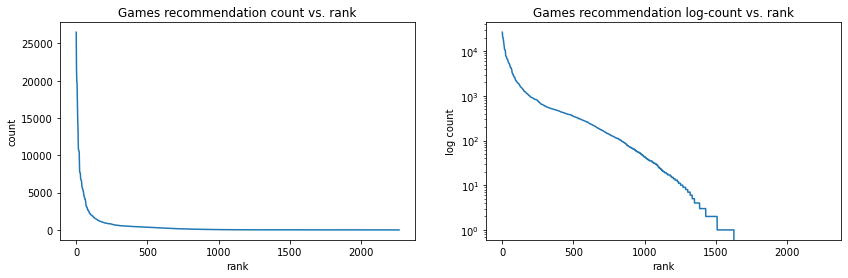

In [9]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

sn.lineplot(x="rank", y="count", data=res[0], ax=ax[0])
ax[0].set_title("Games recommendation count vs. rank")

sn.lineplot(x="rank", y="count", data=res[0], ax=ax[1])
ax[1].set_yscale("log")
ax[1].set_ylabel("log count")
ax[1].set_title("Games recommendation log-count vs. rank")
plt.show()

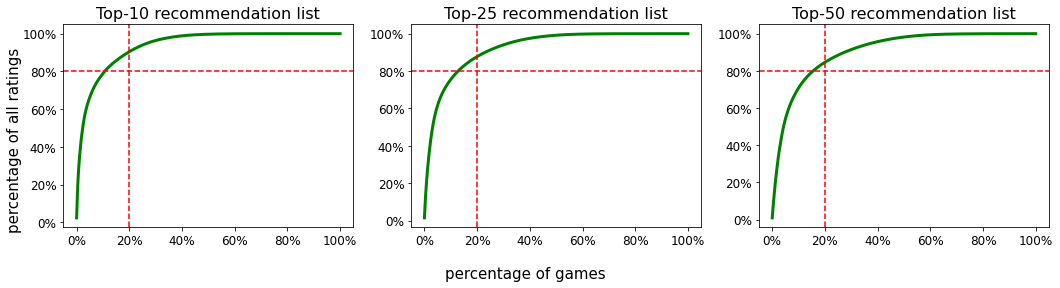

In [14]:
fig, ax = plt.subplots(1,3, figsize=(15,4))

for i in range(3):
    ax[i].plot(np.linspace(0, 100, res[i].shape[0]), res[i].percentage_cumsum.values*100, ls="-", lw=3, c="green")
    ax[i].axhline(80, color="red", ls="--")
    ax[i].axvline(20, color="red", ls="--")
    ax[i].xaxis.set_major_formatter(FuncFormatter(lambda x, _: str(int(x))+"%"))
    ax[i].yaxis.set_major_formatter(FuncFormatter(lambda y, _: str(int(y))+"%"))
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    ax[i].set_title(f"Top-{n_tops[i]} recommendation list", fontsize=16)
    
fig.supylabel('percentage of all ratings', fontsize=15)
fig.supxlabel('percentage of games', fontsize=15)
plt.tight_layout()
plt.show()

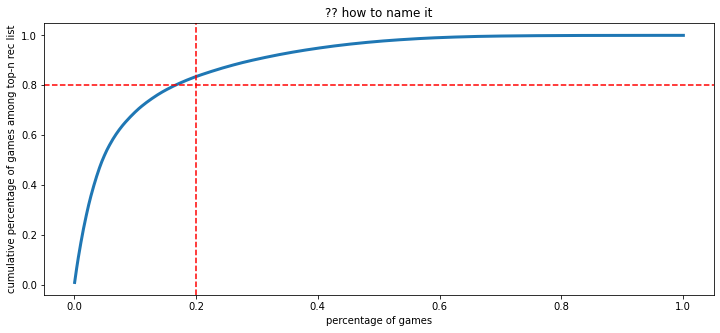

In [102]:
plt.figure(figsize=(12,5))
plt.plot(np.linspace(0.001, 1, res.shape[0]), res.percentage_cumsum.values, ls="-", lw=3)
plt.axhline(0.8, color="red", ls="--")
plt.axvline(0.2, color="red", ls="--")
plt.xlabel("percentage of games")
plt.xticks(ax.get_yticks()
plt.ylabel("cumulative percentage of games among top-n rec list")
plt.title("?? how to name it")
plt.show()